In [1]:
import pickle 
import pandas as pd
import numpy as np
import sys
import os

In [2]:
sys.path.append(os.path.abspath('C:/Users/teeyob/Predictive_Portfolio_Optimizer/scripts'))

In [3]:
from portfolio_optimization import (
    create_portfolio_dataframe,
    calculate_annual_returns,
    calculate_covariance_matrix,
    optimize_portfolio,
    calculate_var,
    plot_cumulative_returns,
    summarize_portfolio_performance
)


Load tsla forecast.pkl file

In [4]:
with open("tsla_forecast.pkl", "rb") as f:
    tsla_forecast = pickle.load(f)

In [5]:

if isinstance(tsla_forecast, np.ndarray):
    tsla_forecast = pd.DataFrame(tsla_forecast, columns=['Close'])
print(tsla_forecast.head()) 



      Close
0  2.544383
1 -0.029352
2  0.015060
3  0.013359
4  0.013419


Create a DataFrame with closing prices for each asset

In [13]:
df = create_portfolio_dataframe(tsla_forecast)
df

,TSLA
0,2.544383
1,-0.029352
2,0.015060
3,0.013359
4,0.013419
...,...
360,0.013417
361,0.013417
362,0.013417
363,0.013417


Calculate annual returns

In [7]:
annual_returns, daily_returns = calculate_annual_returns(df)
annual_returns

TSLA   -1.823009
dtype: float32

Calculate the covariance matrix of daily returns

In [8]:
cov_matrix = calculate_covariance_matrix(daily_returns)
cov_matrix

,TSLA
TSLA,2.29533


Optimization function to find the best portfolio weights

In [9]:
initial_weights = np.array([1.0])
optimal_weights = optimize_portfolio(annual_returns, cov_matrix, initial_weights)
optimal_weights

array([1.])

Summarize portfolio performance

In [10]:
summary = summarize_portfolio_performance(optimal_weights, annual_returns, cov_matrix)
print(summary)

╒════════════════════════╤══════════╕
│ Metric                 │    Value │
╞════════════════════════╪══════════╡
│ Expected Annual Return │ -1.82301 │
├────────────────────────┼──────────┤
│ Annualized Volatility  │  1.51503 │
├────────────────────────┼──────────┤
│ Sharpe Ratio           │ -1.21648 │
├────────────────────────┼──────────┤
│ Optimal Weights        │  1       │
╘════════════════════════╧══════════╛
{'Expected Annual Return': np.float64(-1.8230085372924805), 'Annualized Volatility': np.float64(1.515034675543658), 'Sharpe Ratio': np.float64(-1.2164794423805065), 'Optimal Weights': array([1.])}


Calculate and visualize cumulative returns

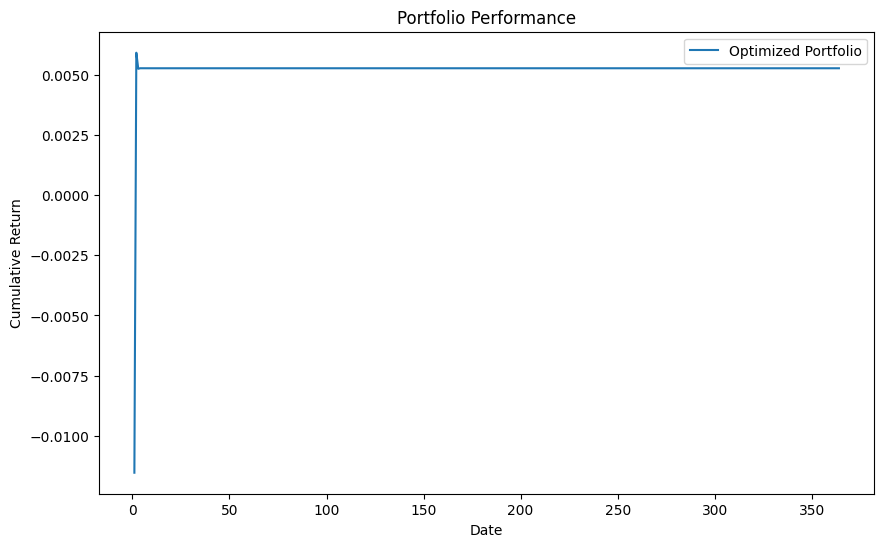

In [11]:
plot_cumulative_returns(daily_returns, optimal_weights)

Calculate Value at Risk (VaR) for a single asset

In [12]:
VaR_TSLA = calculate_var(daily_returns)
print(f"Value at Risk (VaR) for TSLA at 95% confidence: {VaR_TSLA}")

Value at Risk (VaR) for TSLA at 95% confidence: -0.14974774088180445
